In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import re
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [110]:
cafe = pd.read_csv('./result/구별 카페.csv', sep=',')
rest = pd.read_csv('./result/구별 한식점.csv', sep=',')
missing = pd.read_csv('./result/자치구 요일별 신고건수.csv', sep=',')
l_store = pd.read_csv('./result/구별 대규모점포.csv', sep=',')
유원지 = pd.read_csv('./result/구별 유원시설.csv', sep=',')
pop = pd.read_csv('./result/자치구 요일별 총생활인구.csv', sep=',')
park = pd.read_csv('./result/구별 공원개수.csv', sep=',')
liv_pop = pd.read_csv('./result/구별 거주인구.csv', sep=',')

In [111]:
df = pd.merge(cafe, rest, on='자치구', how='outer')
df = pd.merge(df, missing, on='자치구', how='outer')
df = pd.merge(df, l_store, on='자치구', how='outer')
df = pd.merge(df, 유원지, on='자치구', how='outer')
df = pd.merge(df, pop, on=['자치구', 'day'], how='outer')
df = pd.merge(df, park, on='자치구', how='outer')
df = pd.merge(df, liv_pop, on='자치구', how='outer')

In [112]:
df.fillna(0, inplace=True)

## try2

In [113]:
df.drop('day', axis=1, inplace=True)

In [114]:
df.columns

Index(['자치구', '카페 개수', '한식점 개수', '신고건수', '대규모점포', '유원시설', '시군구코드', '총생활인구수',
       '10세미만생활인구', '공원개수', '인구'],
      dtype='object')

In [115]:
df = df[['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설','총생활인구수', '10세미만생활인구', '공원개수', '인구', '신고건수']]

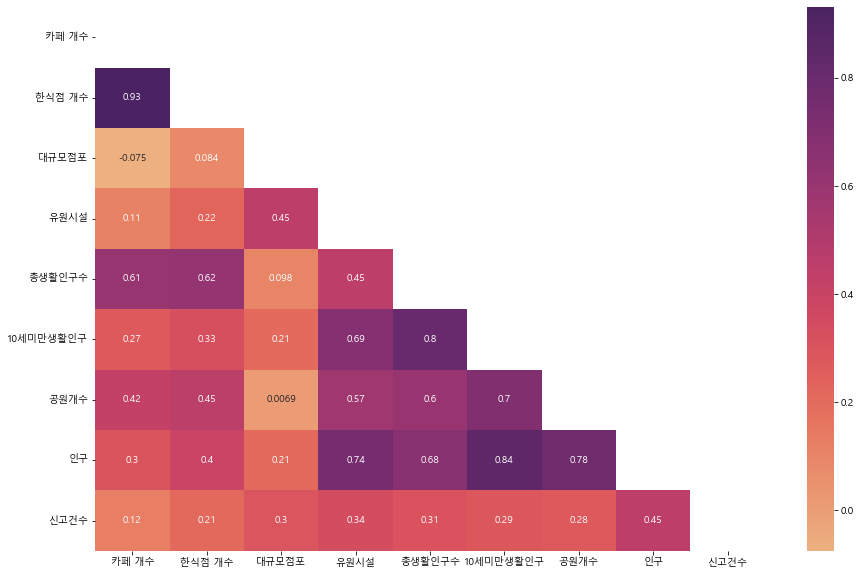

In [116]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='flare')
plt.savefig('./result/heatmap.png')

In [117]:
df.shape

(175, 10)

In [166]:
df.describe()

,카페 개수,한식점 개수,대규모점포,유원시설,총생활인구수,10세미만생활인구,공원개수,인구,신고건수
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.339373,0.394069,0.408980,0.411429,0.456267,0.621129,0.275294,0.485302,10.822857
std,0.180614,0.185476,0.250430,0.210074,0.174261,0.271953,0.288294,0.232288,6.165117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230608,0.282596,0.285714,0.272727,0.345197,0.492617,0.073529,0.346067,6.000000
50%,0.306499,0.369916,0.428571,0.409091,0.469230,0.623671,0.117647,0.495596,10.000000
75%,0.441090,0.430323,0.571429,0.500000,0.554781,0.868966,0.426471,0.630433,14.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


### LinearRegression

In [167]:
X = df[df.columns[1:-1]]
y = df[['신고건수']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) #random_state=42

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [168]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
print('Model TrainSet Score: ', model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.2691158525415762


In [169]:
pred_test = model.predict(X_scaled_test)
print('Model TestSet Score: ', model.score(X_scaled_test, y_test))

Model TestSet Score:  0.40143964089510875


In [170]:
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  5.1593096549730335 , TestSet RMSE:  5.006529075616733


In [171]:
df.describe()

,카페 개수,한식점 개수,대규모점포,유원시설,총생활인구수,10세미만생활인구,공원개수,인구,신고건수
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.339373,0.394069,0.408980,0.411429,0.456267,0.621129,0.275294,0.485302,10.822857
std,0.180614,0.185476,0.250430,0.210074,0.174261,0.271953,0.288294,0.232288,6.165117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230608,0.282596,0.285714,0.272727,0.345197,0.492617,0.073529,0.346067,6.000000
50%,0.306499,0.369916,0.428571,0.409091,0.469230,0.623671,0.117647,0.495596,10.000000
75%,0.441090,0.430323,0.571429,0.500000,0.554781,0.868966,0.426471,0.630433,14.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


In [172]:
df.columns

Index(['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '총생활인구수', '10세미만생활인구',
       '공원개수', '인구', '신고건수'],
      dtype='object')

In [173]:
x_train_new = sm.add_constant(X_train)
x_test_new = sm.add_constant(X_test)
x_train_new.head()

,const,카페 개수,한식점 개수,대규모점포,유원시설,총생활인구수,10세미만생활인구,공원개수,인구
104,1.0,0.544235,0.515849,0.571429,0.454545,0.585141,0.944439,0.558824,0.540475
119,1.0,0.451153,0.668361,0.571429,0.727273,0.571973,0.956453,0.889706,1.000000
141,1.0,0.321593,0.372010,0.142857,0.272727,0.219640,0.204618,0.029412,0.199524
95,1.0,0.306499,0.312799,0.000000,0.136364,0.516969,0.644101,0.125000,0.346067
145,1.0,0.321593,0.372010,0.142857,0.272727,0.191649,0.225297,0.029412,0.199524


In [174]:
multi_model = sm.OLS(y_train, x_train_new).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   신고건수   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.615
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           4.60e-06
Time:                        12:54:35   Log-Likelihood:                -400.83
No. Observations:                 131   AIC:                             819.7
Df Residuals:                     122   BIC:                             845.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5396      1.641      2.158      0.0

In [175]:
multi_model2 = sm.OLS(y_test, x_test_new).fit()
print(multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   신고건수   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6.747
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.48e-05
Time:                        12:54:35   Log-Likelihood:                -124.07
No. Observations:                  44   AIC:                             266.1
Df Residuals:                      35   BIC:                             282.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9769      2.899      0.337      0.7

### OLS

In [176]:
from sklearn.preprocessing import MinMaxScaler

X = df[df.columns[1:-1]]
y = df[['신고건수']]
scaler = MinMaxScaler()
df[df.columns[1:-1]] = scaler.fit_transform(X)

In [177]:
model = sm.OLS(df['신고건수'], df[df.columns[1:-1]])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   신고건수   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              100.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    7.05e-60
Time:                        12:54:36   Log-Likelihood:                         -535.32
No. Observations:                 175   AIC:                                      1087.
Df Residuals:                     167   BIC:                                      1112.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [178]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,45.743584
1,한식점 개수,56.591796
2,대규모점포,5.665748
3,유원시설,14.679315
4,총생활인구수,43.739596
5,10세미만생활인구,47.728915
6,공원개수,5.082218
7,인구,30.413975


In [179]:
model = sm.OLS(df['신고건수'], df[['카페 개수', '한식점 개수', '대규모점포', '유원시설', '총생활인구수', '인구', '공원개수']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   신고건수   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              105.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    3.80e-58
Time:                        12:54:36   Log-Likelihood:                         -542.03
No. Observations:                 175   AIC:                                      1098.
Df Residuals:                     168   BIC:                                      1120.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [180]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,45.695852
1,한식점 개수,54.479719
2,대규모점포,5.638872
3,유원시설,13.764509
4,총생활인구수,19.840567
5,인구,25.332991
6,공원개수,4.982354


In [181]:
model = sm.OLS(df['신고건수'], df[['카페 개수', '대규모점포', '유원시설', '총생활인구수', '공원개수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   신고건수   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              123.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    4.04e-59
Time:                        12:54:37   Log-Likelihood:                         -542.25
No. Observations:                 175   AIC:                                      1097.
Df Residuals:                     169   BIC:                                      1115.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [182]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,7.558691
1,대규모점포,4.957159
2,유원시설,13.746277
3,총생활인구수,19.813118
4,공원개수,4.977461
5,인구,24.455587


In [183]:
model = sm.OLS(df['신고건수'], df[['대규모점포', '유원시설', '공원개수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   신고건수   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              181.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.88e-60
Time:                        12:54:37   Log-Likelihood:                         -544.48
No. Observations:                 175   AIC:                                      1097.
Df Residuals:                     171   BIC:                                      1110.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [184]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,4.754069
1,유원시설,13.604271
2,공원개수,4.821344
3,인구,15.330343


In [185]:
model = sm.OLS(df['신고건수'], df[['대규모점포', '공원개수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   신고건수   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              241.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.80e-61
Time:                        12:54:37   Log-Likelihood:                         -544.98
No. Observations:                 175   AIC:                                      1096.
Df Residuals:                     172   BIC:                                      1105.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [186]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,3.598772
1,공원개수,4.779133
2,인구,9.353317


## KNN Regressor

In [187]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
print('Model TrainSet Score: ', model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.6874760158465014


In [188]:
pred_test = model.predict(X_scaled_test)
print('Model TestSet Score: ', model.score(X_scaled_test, y_test))

Model TestSet Score:  0.505249654627985


In [189]:
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  3.3737197175853875 , TestSet RMSE:  4.551722950508062


In [190]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 5}
Best Score: 0.4743
TestSet Score: 0.5052


In [212]:
b_model = KNeighborsRegressor(n_neighbors=5)
b_model.fit(X_scaled_train, y_train)
pred_train = b_model.predict(X_scaled_train)
print('Model TrainSet Score: ',b_model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.6874760158465014


In [213]:
pred_test = b_model.predict(X_scaled_test)
print('Model TestSet Score: ', b_model.score(X_scaled_test, y_test))

Model TestSet Score:  0.505249654627985


In [214]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  3.3737197175853875 , TestSet RMSE:  4.551722950508062


## SVM

In [194]:
from sklearn.svm import SVR

model = SVR(kernel='poly')
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
print('Model TrainSet Score: ', model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.3164543165331066


In [195]:
pred_test = model.predict(X_scaled_test)
print('Model TestSet Score: ', model.score(X_scaled_test, y_test))

Model TestSet Score:  0.3436026712461723


In [196]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  4.989431859142664 , TestSet RMSE:  5.242834752114598


In [197]:
param_grid = {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Best Score: 0.3223
TestSet Score: 0.4832


## 의사결정나무

In [198]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
print('Model TrainSet Score: ', model.score(X_scaled_train, y_train))

Model TrainSet Score:  1.0


In [199]:
pred_test = model.predict(X_scaled_test)
print('Model TestSet Score: ', model.score(X_scaled_test, y_test))

Model TestSet Score:  0.1348924412867576


In [200]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  0.0 , TestSet RMSE:  6.018909596203678


In [201]:
param_grid = {'max_depth': range(2, 20, 2), 'min_samples_leaf': range(1, 50, 2)}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'max_depth': 6, 'min_samples_leaf': 13}
Best Score: 0.5165
TestSet Score: 0.4909


In [215]:
b_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=13)
b_model.fit(X_scaled_train, y_train)
pred_train = b_model.predict(X_scaled_train)
print('Model TrainSet Score: ', b_model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.6360411845327183


In [216]:
pred_test = b_model.predict(X_scaled_test)
print('Model TestSet Score: ', b_model.score(X_scaled_test, y_test))

Model TestSet Score:  0.49092502236509217


In [217]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  3.640771683401851 , TestSet RMSE:  4.617146368956076


## 랜덤포레스트

In [205]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
print('Model TrainSet Score: ', model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.9317072088461366


In [206]:
pred_test = model.predict(X_scaled_test)
print('Model TestSet Score: ', model.score(X_scaled_test, y_test))

Model TestSet Score:  0.44829719261890677


In [207]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  1.5770837421554356 , TestSet RMSE:  4.806571023089121


In [208]:
param_grid = {'n_estimators': range(100, 500, 100), 'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 300}
Best Score: 0.4603
TestSet Score: 0.4511


In [209]:
b_model = RandomForestRegressor(max_features='sqrt', n_estimators=300)
b_model.fit(X_scaled_train, y_train)
pred_train = b_model.predict(X_scaled_train)
print('Model TrainSet Score: ', b_model.score(X_scaled_train, y_train))

Model TrainSet Score:  0.935560679804264


In [210]:
pred_test =b_model.predict(X_scaled_test)
print('Model TestSet Score: ', b_model.score(X_scaled_test, y_test))

Model TestSet Score:  0.4590100075056227


In [211]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('TrainSet RMSE: ', np.sqrt(MSE_train), ', TestSet RMSE: ', np.sqrt(MSE_test))

TrainSet RMSE:  1.531943676684284 , TestSet RMSE:  4.759675914351862
